In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns
from scipy import stats


In [3]:
def z_score(x,mean,sd):      # function to calculate Z score
    return (x-mean)/sd

In [4]:
data=pd.DataFrame(pd.read_csv("Cardiotocographic.csv"))  # Reading CSV and creating data frame

In [5]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


LB,AC,DS,DP,MLTV,Width,Tendency ,NSP has missing values.

In [7]:
data.shape

(2126, 14)

In [8]:
data.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

All are numeric type columns

In [9]:
data['Tendency'].value_counts()

Tendency
 0.000000    1037
 1.000000     804
-1.000000     149
-3.000000       5
 3.000000       4
             ... 
-0.018994       1
-0.019886       1
-0.026640       1
-0.009974       1
 1.002932       1
Name: count, Length: 111, dtype: int64

Checking Repeating Rows

In [10]:
data[data.duplicated(keep=False)]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1113,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1457,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [11]:
data=data.drop_duplicates(keep='first')

In [12]:
data.shape

(2124, 14)

We can see from shape 2 rows were deleted , which repeated.

In [13]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2103.000000,2104.000000,2124.000000,2124.000000,2124.000000,2103.000000,2103.000000,2124.000000,2124.000000,2124.000000,2103.000000,2103.000000,2103.000000,2103.000000
mean,133.342023,0.003220,0.009904,0.004394,0.001897,0.000003,0.000175,47.012459,1.364345,10.295650,8.280546,70.461052,0.316672,1.304797
std,11.268266,0.004392,0.067571,0.003340,0.003344,0.000142,0.000840,18.812403,1.174084,21.212676,7.774969,42.939806,0.645855,0.644857
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004486,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.486468,0.000000,1.000000
75%,140.000000,0.005650,0.002568,0.006536,0.003292,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


### Missing / Naan values

In [14]:
data[data.isnull().any(axis=1)]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
50,NaN,NaN,0.000000,0.008086,0.000000,NaN,NaN,29.000000,1.300000,0.000000,NaN,NaN,NaN,NaN
116,NaN,0.038567,0.000000,0.006993,0.002331,NaN,NaN,26.000000,4.300000,0.532872,NaN,NaN,NaN,NaN
126,NaN,NaN,0.000000,0.004380,0.000000,NaN,NaN,69.000000,0.300000,21.000000,NaN,NaN,NaN,NaN
201,NaN,NaN,0.016393,0.000000,0.000000,NaN,NaN,56.000000,0.500000,12.000000,NaN,NaN,NaN,NaN
566,NaN,NaN,0.000000,0.004115,0.005487,NaN,NaN,43.000000,2.500000,0.000000,NaN,NaN,NaN,NaN
574,NaN,NaN,0.000000,0.002611,0.002611,NaN,NaN,34.000000,4.900000,0.000000,NaN,NaN,NaN,NaN
603,NaN,NaN,0.006519,0.001304,0.001304,NaN,NaN,73.000000,0.700000,0.000000,NaN,NaN,NaN,NaN
935,NaN,NaN,0.000000,0.005495,0.001374,NaN,NaN,30.000000,1.251793,0.000000,NaN,NaN,NaN,NaN
936,NaN,NaN,0.000000,0.007802,0.000000,NaN,NaN,33.000000,1.000000,0.000000,NaN,NaN,NaN,NaN
1013,NaN,NaN,0.000000,0.003861,0.000000,NaN,NaN,34.000000,1.000000,0.000000,NaN,NaN,NaN,NaN


LB,AC,DS,DP,MLTV,Width,Tendency ,NSP has missing values.

In [15]:
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [16]:
data['LB'].mean()

133.3420230800519

In [17]:
data['LB'].median()


133.0

In [18]:
data['LB']=data['LB'].fillna(data['LB'].median())

C:\Users\amrit\AppData\Local\Temp\ipykernel_26804\3050454165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LB']=data['LB'].fillna(data['LB'].median())


In [19]:
data.isnull().sum()

LB           0
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [20]:
data['AC'].mean(),data['AC'].median()

(0.0032197961979291345, 0.001633991)

In [21]:
data['AC']=data['AC'].fillna(data['AC'].median())

C:\Users\amrit\AppData\Local\Temp\ipykernel_26804\3974819177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AC']=data['AC'].fillna(data['AC'].median())


In [22]:
data['DS'].mean(),data['DS'].median()

(2.511369605097549e-06, 0.0)

In [23]:
data['DS']=data['DS'].fillna(data['DS'].median())

C:\Users\amrit\AppData\Local\Temp\ipykernel_26804\3029498716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DS']=data['DS'].fillna(data['DS'].median())


In [24]:
data['DP'].mean(),data['DP'].median()

(0.00017531778446317666, 0.0)

In [25]:
data['DP']=data['DP'].fillna(data['DP'].median())

C:\Users\amrit\AppData\Local\Temp\ipykernel_26804\3345560302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DP']=data['DP'].fillna(data['DP'].median())


In [26]:
data['MLTV'].mean(),data['MLTV'].median()

(8.28054590298053, 7.4)

In [27]:
data['MLTV']=data['MLTV'].fillna(data['MLTV'].median())

C:\Users\amrit\AppData\Local\Temp\ipykernel_26804\2484698592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MLTV']=data['MLTV'].fillna(data['MLTV'].median())


In [28]:
data['Width'].mean(),data['Width'].median()

(70.46105246796047, 67.48646809530248)

In [29]:
data['Width']=data['Width'].fillna(data['Width'].median())

C:\Users\amrit\AppData\Local\Temp\ipykernel_26804\2895002147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Width']=data['Width'].fillna(data['Width'].median())


In [30]:
data['Tendency'].mean(),data['Tendency'].median()

(0.31667228014592036, 0.0)

In [31]:
data['Tendency']=data['Tendency'].fillna(data['Tendency'].median())

C:\Users\amrit\AppData\Local\Temp\ipykernel_26804\1984851233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tendency']=data['Tendency'].fillna(data['Tendency'].median())


In [32]:
data['NSP'].mean(),data['NSP'].median()

(1.304796768239931, 1.0)

In [33]:
data['NSP']=data['NSP'].fillna(data['NSP'].median())

C:\Users\amrit\AppData\Local\Temp\ipykernel_26804\3415730256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NSP']=data['NSP'].fillna(data['NSP'].median())


In [34]:
data.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

All null values are populated with Respective column means.

In [35]:
data.loc[50]

LB          133.000000
AC            0.001634
FM            0.000000
UC            0.008086
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         29.000000
MSTV          1.300000
ALTV          0.000000
MLTV          7.400000
Width        67.486468
Tendency      0.000000
NSP           1.000000
Name: 50, dtype: float64

### Finding  outliers ( data points that are 2 std away from mean) sample code

In [36]:
for x in data["LB"]:
    mean = data["LB"].mean()
    std = data["LB"].std()
    if (x<(mean-3*std)) or (x > (mean+3*std)):
        print(x, end=' ')

52.0 214.0 214.0 214.0 52.0 51.84248683343552 214.0 214.0 214.0 52.18854680260237 

 ## Data Vizualization and measuring Central tendency and dispersion

#### LB

<Axes: >

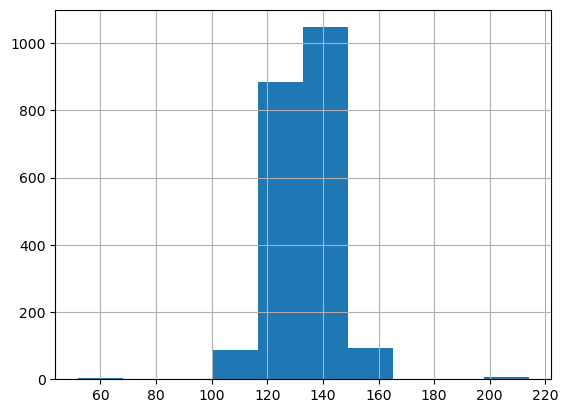

In [37]:
data['LB'].hist()

In [38]:
data['LB'].mean()

133.33864149592708

In [39]:
data['LB'].median()

133.0

In [40]:
data['LB'].std()

11.21244739992819

{'whiskers': [<matplotlib.lines.Line2D at 0x2c58ee86790>,
 'caps': [<matplotlib.lines.Line2D at 0x2c58ef2ac10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c58ef28610>],
 'medians': [<matplotlib.lines.Line2D at 0x2c58ef341d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c58ef34c90>],
 'means': []}

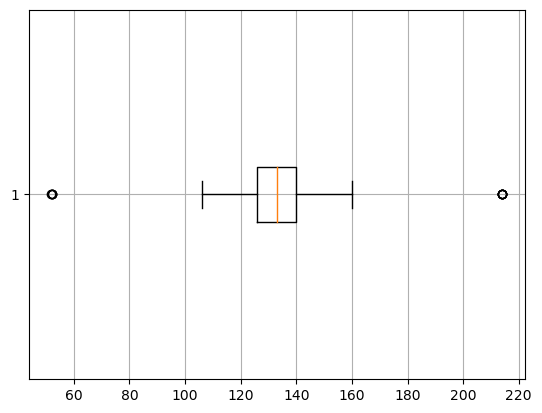

In [41]:
plt.grid()
plt.boxplot(data['LB'],vert=False)

In [42]:
q1,q3=np.percentile(data["LB"],[25,75])

In [43]:
q3,q1

(140.0, 126.0)

In [44]:
q3-q1

14.0

{'bodies': [<matplotlib.collections.PolyCollection at 0x2c58ed3c990>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2c58ed5c590>,
 'cmins': <matplotlib.collections.LineCollection at 0x2c58ed5db50>,
 'cbars': <matplotlib.collections.LineCollection at 0x2c58ef4ea90>,
 'cmedians': <matplotlib.collections.LineCollection at 0x2c58ef445d0>}

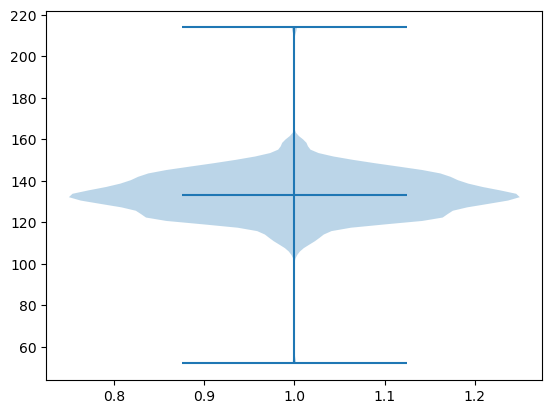

In [45]:
plt.figure()
plt.violinplot(data["LB"], showmedians=True)


In [46]:
lb=[]
for values in data['LB']:
    x=z_score(values,data["LB"].mean(),data["LB"].std())  # mean , sd
    lb.append(x)

C:\Users\amrit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


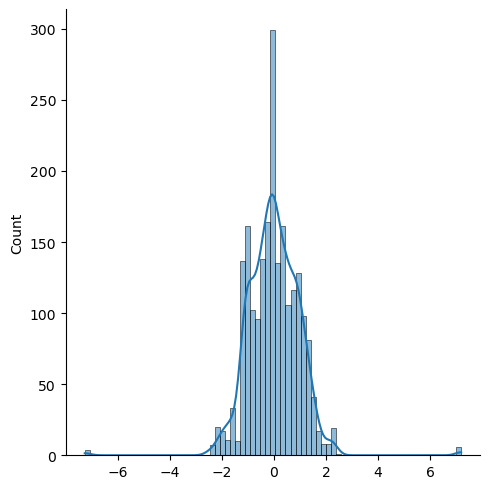

In [47]:
sns.displot(lb,kde=True)

In [48]:
data["LB"].kurtosis()

11.379510335747009

In [49]:
data["LB"].skew()

0.3235694716128613

#### AC

In [50]:
data['AC'].mean(),data['AC'].median()

(0.0032048639455945853, 0.001633991)

In [51]:
data['AC'].value_counts()

AC
0.000000    832
0.001634     20
0.000834     13
0.005838      9
0.005004      9
           ... 
0.014907      1
0.008006      1
0.012431      1
0.011986      1
0.001616      1
Name: count, Length: 1068, dtype: int64

mode=0

In [52]:
data['AC'].std()

0.00437412327762754

<Axes: >

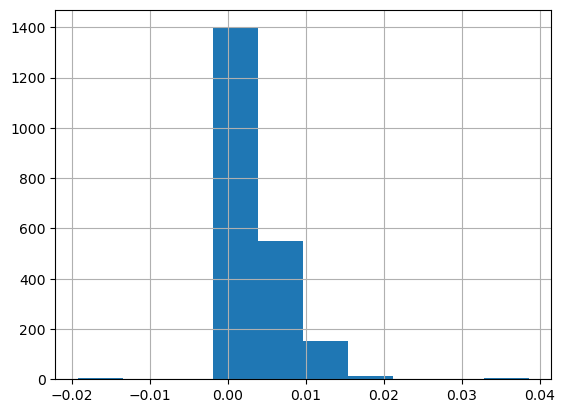

In [53]:
data['AC'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x2c5901e4f50>,
 'caps': [<matplotlib.lines.Line2D at 0x2c5901e64d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c5901e42d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c5901e7b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c58ef44550>],
 'means': []}

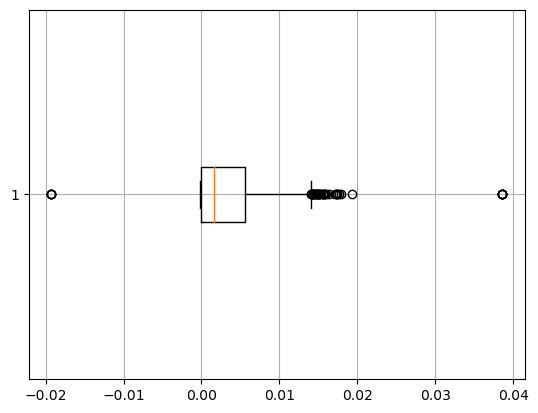

In [54]:
plt.grid()
plt.boxplot(data['AC'],vert=False)

In [55]:
q1,q3=np.percentile(data['AC'],[25,75])
q3-q1 #iqr

0.005612068

{'bodies': [<matplotlib.collections.PolyCollection at 0x2c59013d190>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2c5901c1210>,
 'cmins': <matplotlib.collections.LineCollection at 0x2c590253910>,
 'cbars': <matplotlib.collections.LineCollection at 0x2c59019b450>,
 'cmedians': <matplotlib.collections.LineCollection at 0x2c59025c6d0>}

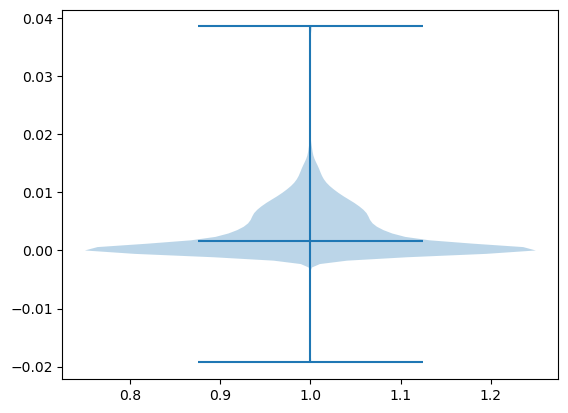

In [56]:
plt.figure()
plt.violinplot(data["AC"], showmedians=True)


In [57]:
ac=[]
for values in data['AC']:
    x=z_score(values,data["AC"].mean(),data["AC"].std())  # mean , sd
    ac.append(x)


C:\Users\amrit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


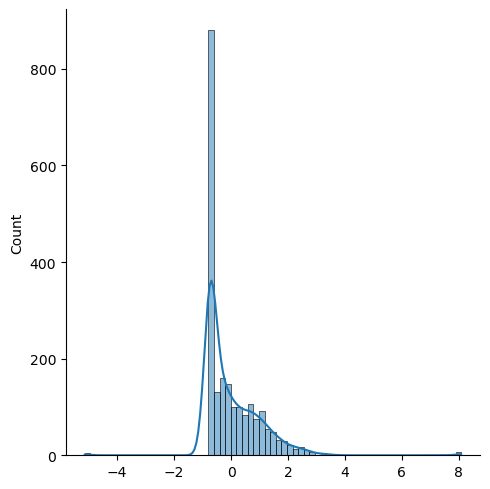

In [58]:
sns.displot(ac,kde=True)

In [59]:
data["AC"].skew()

2.0320026464534795

In [60]:
data["AC"].kurtosis()

12.6488654921864

### FM

In [75]:
data['FM'].mean(),data['FM'].median()

(0.009903801014186437, 0.0)

In [76]:
data['FM'].value_counts()

FM
 0.000000    1230
 0.000834      10
 0.001668       9
 0.003336       9
 0.005838       7
             ... 
 0.001229       1
 0.028708       1
 0.002894       1
-0.000519       1
-0.000188       1
Name: count, Length: 776, dtype: int64

In [77]:
data['FM'].std()

0.06757080242256783

<Axes: >

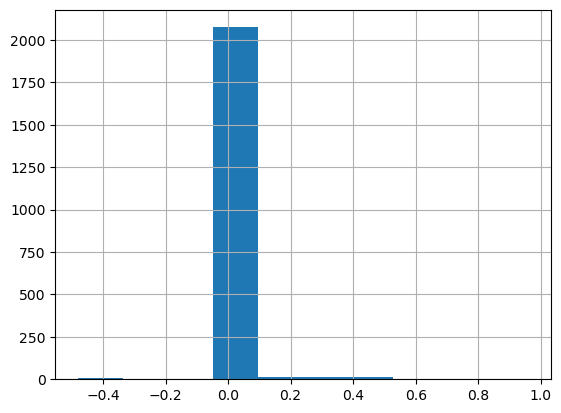

In [78]:
data['FM'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x24813412190>,
 'caps': [<matplotlib.lines.Line2D at 0x24813413750>,
 'boxes': [<matplotlib.lines.Line2D at 0x248134116d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2481341cd10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2481341d690>],
 'means': []}

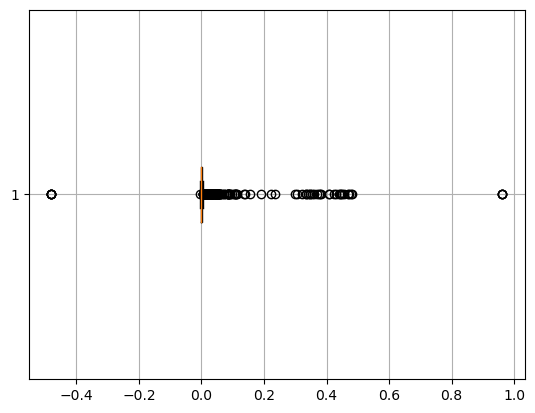

In [79]:
plt.grid()
plt.boxplot(data['FM'],vert=False)

In [80]:
q1,q3=np.percentile(data['FM'],[25,75])
q3-q1

0.00256842175

{'bodies': [<matplotlib.collections.PolyCollection at 0x2483d8677d0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2483d687c90>,
 'cmins': <matplotlib.collections.LineCollection at 0x2483e886910>,
 'cbars': <matplotlib.collections.LineCollection at 0x2483d6fcbd0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x2483d779110>}

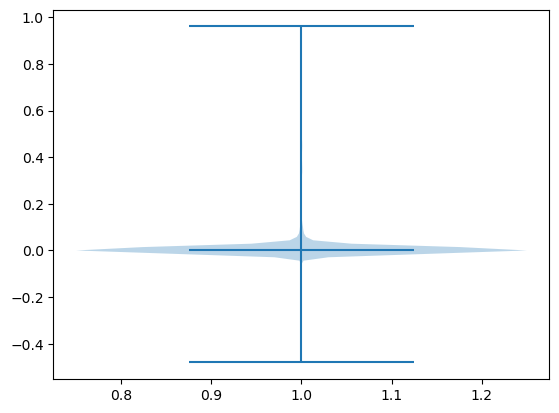

In [182]:
plt.figure()
plt.violinplot(data["FM"], showmedians=True)


C:\Users\amrit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


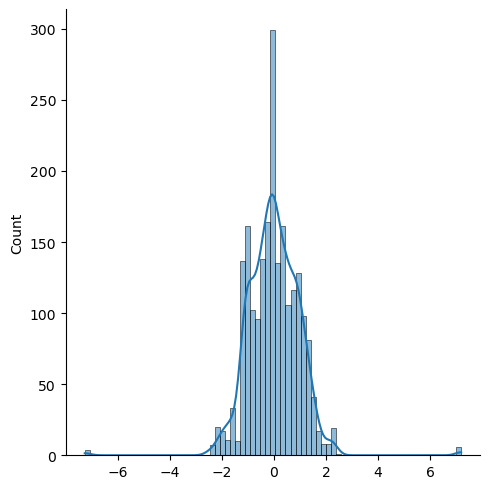

In [112]:
fm=[]
data["FM"].mean()
for values in data['FM']:
    x=z_score(values,data["FM"].mean(),data["FM"].std())  # mean , sd
    fm.append(x)
sns.displot(lb,kde=True)

In [81]:
data["FM"].skew()

6.749690760371197

In [82]:
data["FM"].kurtosis()

94.38097740654808

#### UC

In [54]:
data['UC'].mean(),data['UC'].median(),data['UC'].std()

(0.004393639313562135, 0.0044863175, 0.003340384035600695)

In [55]:
data['UC'].value_counts()

UC
0.000000    317
0.000834     24
0.001668     15
0.002502     12
0.004170     10
           ... 
0.008287      1
0.008242      1
0.008006      1
0.006211      1
0.006110      1
Name: count, Length: 1364, dtype: int64

<Axes: >

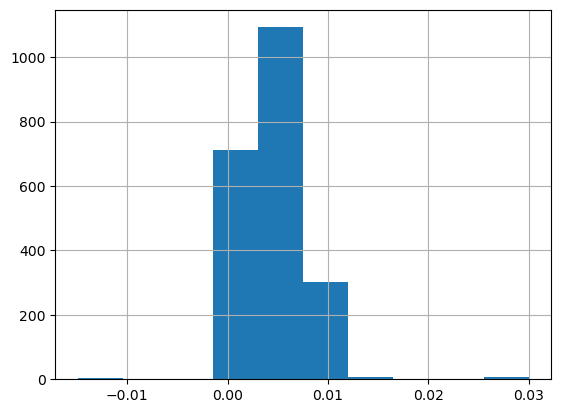

In [56]:
data['UC'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x24811df8b50>,
 'caps': [<matplotlib.lines.Line2D at 0x24811dfa0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24811de7f90>],
 'medians': [<matplotlib.lines.Line2D at 0x24811dfb590>],
 'fliers': [<matplotlib.lines.Line2D at 0x24811dfbf90>],
 'means': []}

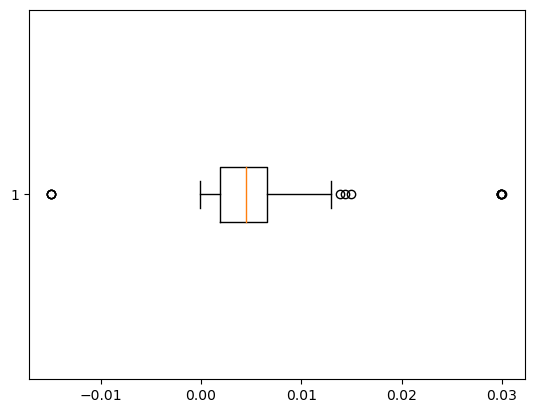

In [57]:
plt.boxplot(data['UC'],vert=False)

In [58]:
q1,q3=np.percentile(data['UC'],[25,75])
q3-q1

0.00467761975

{'bodies': [<matplotlib.collections.PolyCollection at 0x2483e8af150>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2483d7bc890>,
 'cmins': <matplotlib.collections.LineCollection at 0x2483e906590>,
 'cbars': <matplotlib.collections.LineCollection at 0x2483e906290>,
 'cmedians': <matplotlib.collections.LineCollection at 0x2483e887950>}

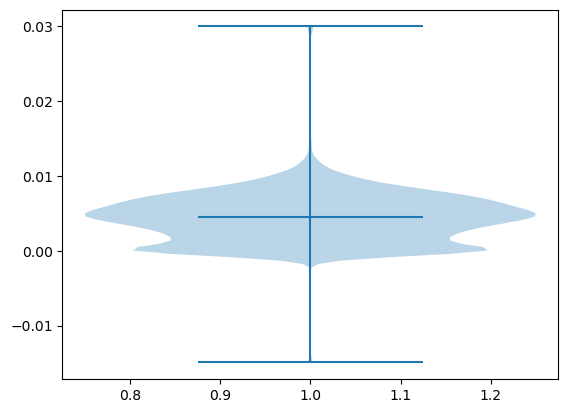

In [183]:
plt.figure()
plt.violinplot(data["UC"], showmedians=True)


C:\Users\amrit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


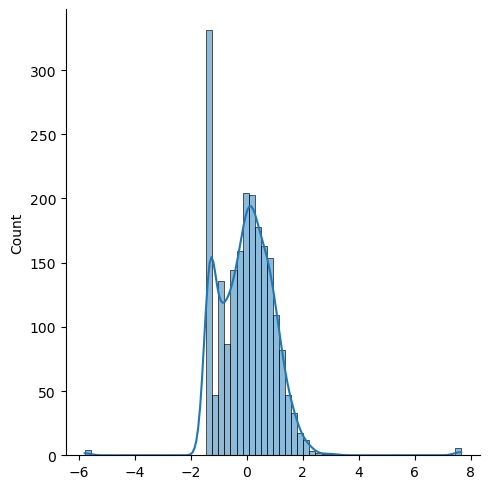

In [184]:
uc=[]
for values in data['UC']:
    x=z_score(values,data["UC"].mean(),data["UC"].std())  # mean , sd
    uc.append(x)
sns.displot(uc,kde=True)


In [185]:
data["UC"].kurtosis(),data["UC"].skew()

(10.13613251417715, 0.9736850759520393)

#### DL

In [59]:
data['DL'].mean(),data['DL'].median(),data['DL'].std()

(0.0018971294572578793, 0.0, 0.0033437499350879307)

In [60]:
data['DL'].value_counts()

DL
 0.000000    1164
 0.000834      22
 0.001668       6
 0.002502       5
-0.015385       5
             ... 
 0.001003       1
 0.000958       1
 0.001214       1
 0.007716       1
 0.001244       1
Name: count, Length: 822, dtype: int64

<Axes: >

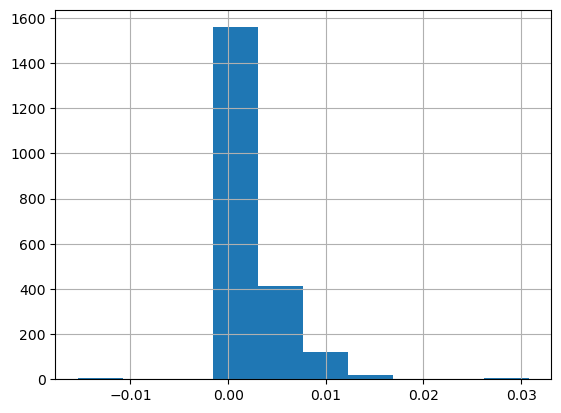

In [61]:
data['DL'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x24812ff80d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24812ff97d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24812fe7550>],
 'medians': [<matplotlib.lines.Line2D at 0x24812ffab90>],
 'fliers': [<matplotlib.lines.Line2D at 0x24812ffb510>],
 'means': []}

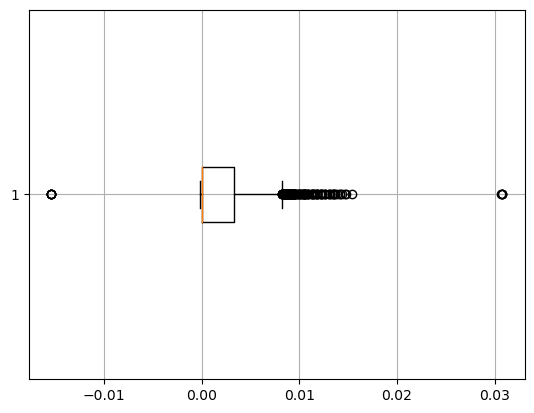

In [62]:
plt.grid()
plt.boxplot(data['DL'],vert=False)

In [63]:
q1,q3=np.percentile(data['DL'],[25,75])
q3-q1

0.003292188

{'bodies': [<matplotlib.collections.PolyCollection at 0x2483ea7c610>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2483e93d250>,
 'cmins': <matplotlib.collections.LineCollection at 0x2483d7aef10>,
 'cbars': <matplotlib.collections.LineCollection at 0x2483ea7d550>,
 'cmedians': <matplotlib.collections.LineCollection at 0x2483e907950>}

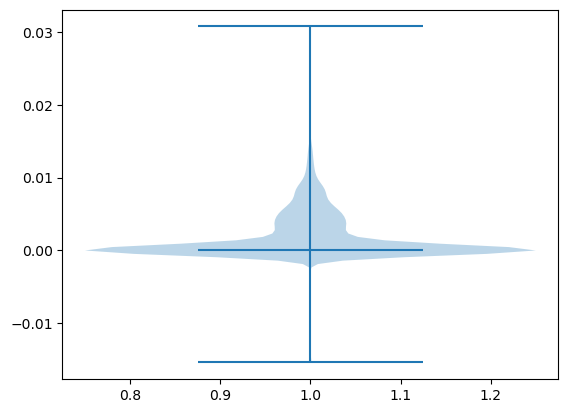

In [186]:
plt.figure()
plt.violinplot(data["DL"], showmedians=True)

C:\Users\amrit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


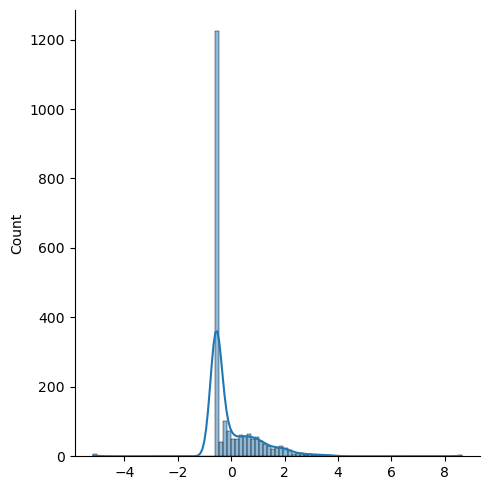

In [113]:
dl=[]
for values in data['DL']:
    x=z_score(values,data["DL"].mean(),data["DL"].std())  # mean , sd
    dl.append(x)
sns.displot(dl,kde=True)

In [114]:
data["DL"].kurtosis(),data["DL"].skew()


(12.84824259797963, 2.0089272980518125)

#### DS

In [64]:
data['DS'].mean(),data['DS'].median(),data['DS'].std()

(2.4865396796234204e-06, 0.0, 0.00014090090368845744)

In [65]:
data['DS'].value_counts()

DS
 0.000000e+00    2004
-1.353180e-03       7
 2.706360e-03       2
 1.078749e-03       1
 1.428324e-06       1
                 ... 
-2.900000e-06       1
 4.565852e-06       1
 1.354294e-08       1
-2.510000e-06       1
 9.488398e-07       1
Name: count, Length: 114, dtype: int64

<Axes: >

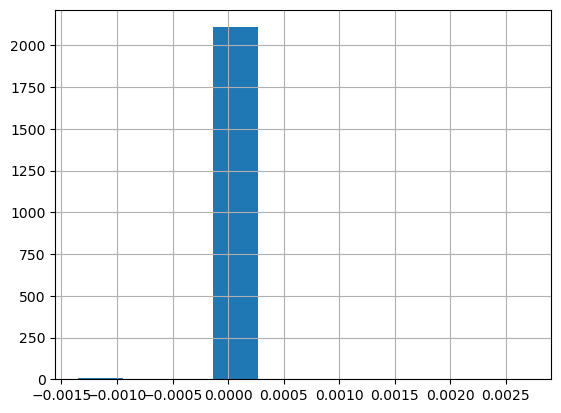

In [66]:
data['DS'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x248130e5c50>,
 'caps': [<matplotlib.lines.Line2D at 0x248130e7390>,
 'boxes': [<matplotlib.lines.Line2D at 0x248130e5190>],
 'medians': [<matplotlib.lines.Line2D at 0x248130fc910>],
 'fliers': [<matplotlib.lines.Line2D at 0x248130fd2d0>],
 'means': []}

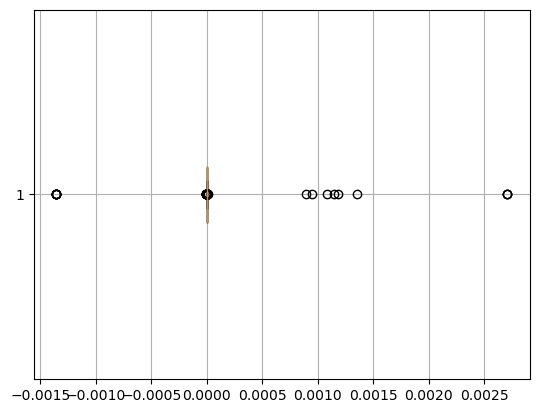

In [67]:
plt.grid()
plt.boxplot(data['DS'],vert=False)

In [68]:
q1,q3=np.percentile(data['DS'],[25,75])
q3-q1

0.0

In [69]:
q1,q3

(0.0, 0.0)

C:\Users\amrit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


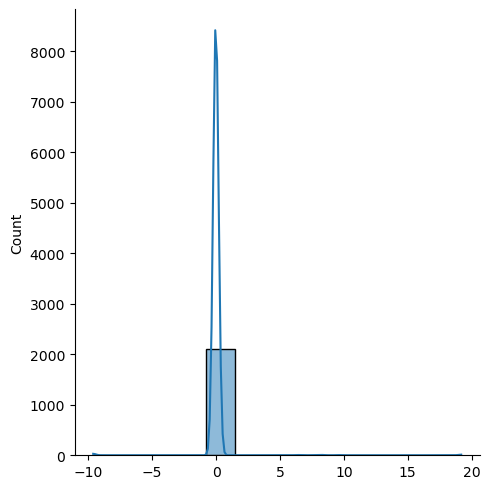

In [115]:
ds=[]
for values in data['DS']:
    x=z_score(values,data["DS"].mean(),data["DS"].std())  # mean , sd
    ds.append(x)
sns.displot(ds,kde=True)

In [116]:
data["DS"].kurtosis(),data["DS"].skew()

(228.89700898074383, 8.457283005105776)

### DP

<Axes: >

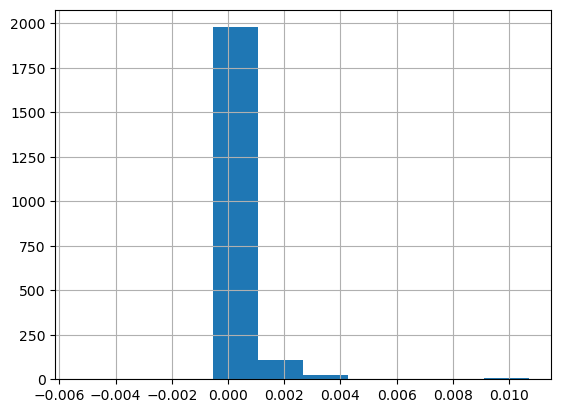

In [117]:
data['DP'].hist()


In [118]:
data['DP'].mean(),data['DP'].median(),data['DP'].std()

(0.00017358441653769326, 0.0, 0.0008361678298758593)

{'whiskers': [<matplotlib.lines.Line2D at 0x248298c3c10>,
 'caps': [<matplotlib.lines.Line2D at 0x24829902fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24829901090>],
 'medians': [<matplotlib.lines.Line2D at 0x2482990c590>],
 'fliers': [<matplotlib.lines.Line2D at 0x2482990d050>],
 'means': []}

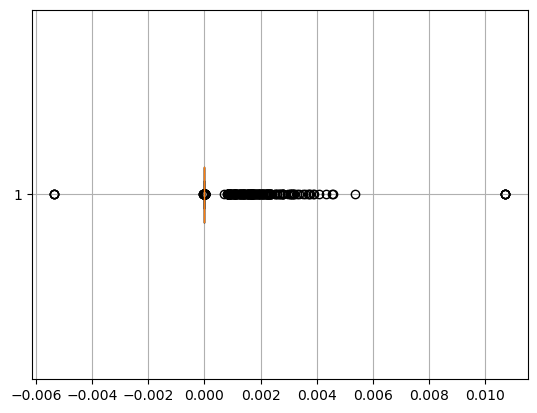

In [119]:
plt.grid()
plt.boxplot(data['DP'],vert=False)


In [125]:
q1,q3=np.percentile(data["DP"],[25,75])
q1


0.0

In [124]:
q3-q1

0.0

C:\Users\amrit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


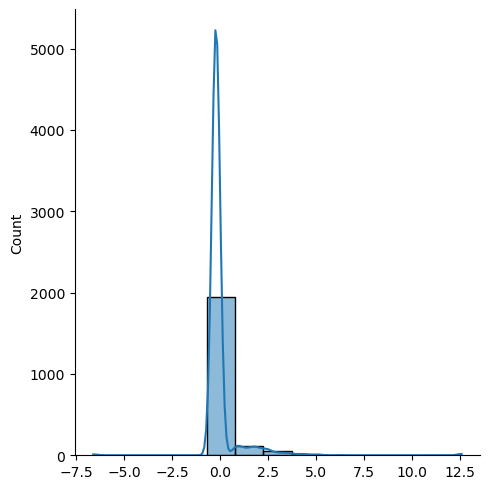

In [121]:
dp=[]
for values in data['DP']:
    x=z_score(values,data["DP"].mean(),data["DP"].std())  # mean , sd
    dp.append(x)
sns.displot(dp,kde=True)

In [122]:
data["DP"].kurtosis(),data["DP"].skew()


(76.72597035643537, 6.453123654223516)

### ASTV

<Axes: >

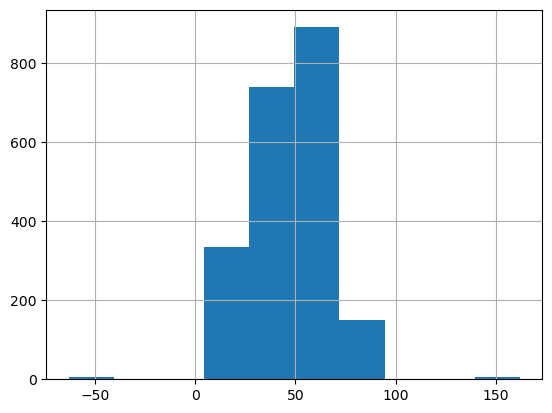

In [126]:
data['ASTV'].hist()

In [127]:
data['ASTV'].mean(),data['ASTV'].median(),data['ASTV'].std()

(47.01245871631117, 49.0, 18.812403291543866)

{'whiskers': [<matplotlib.lines.Line2D at 0x248297b1350>,
 'caps': [<matplotlib.lines.Line2D at 0x2482985dc90>,
 'boxes': [<matplotlib.lines.Line2D at 0x24829853b50>],
 'medians': [<matplotlib.lines.Line2D at 0x2482985f250>],
 'fliers': [<matplotlib.lines.Line2D at 0x2482844da10>],
 'means': []}

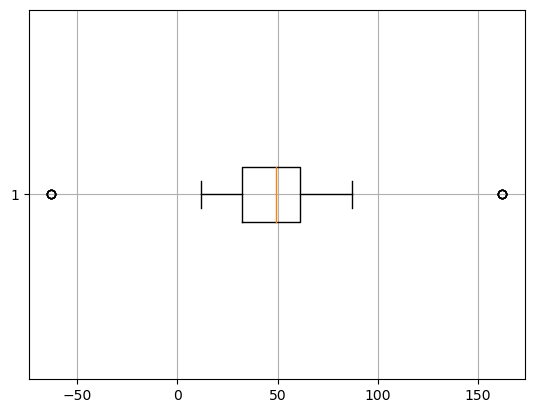

In [128]:
plt.grid()
plt.boxplot(data['ASTV'],vert=False)


In [129]:
q1,q3=np.percentile(data["ASTV"],[25,75])
q3-q1

29.0

C:\Users\amrit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


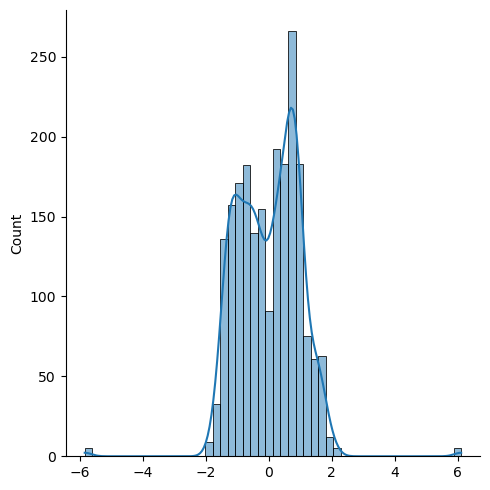

In [130]:
astv=[]
for values in data['ASTV']:
    x=z_score(values,data["ASTV"].mean(),data["ASTV"].std())  # mean , sd
    astv.append(x)
sns.displot(astv,kde=True)

In [131]:
data["ASTV"].kurtosis(),data["ASTV"].skew()

(4.410605805545654, 0.054886809061591824)

### MSTV

<Axes: >

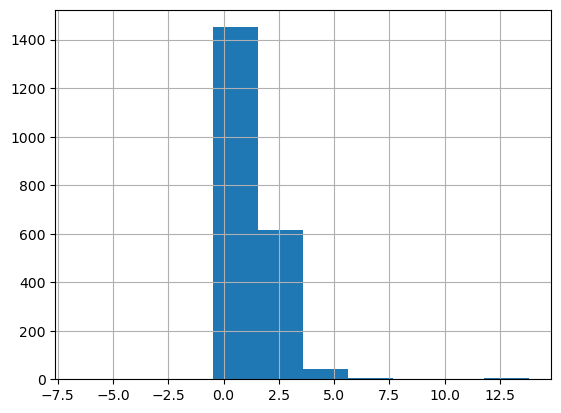

In [132]:
data['MSTV'].hist()

In [133]:
data['MSTV'].mean(),data['MSTV'].median(),data['MSTV'].std()

(1.3643448094373316, 1.2, 1.1740840555176344)

{'whiskers': [<matplotlib.lines.Line2D at 0x24829a741d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24829a75810>,
 'boxes': [<matplotlib.lines.Line2D at 0x24829a6f690>],
 'medians': [<matplotlib.lines.Line2D at 0x24829a76e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x24829a777d0>],
 'means': []}

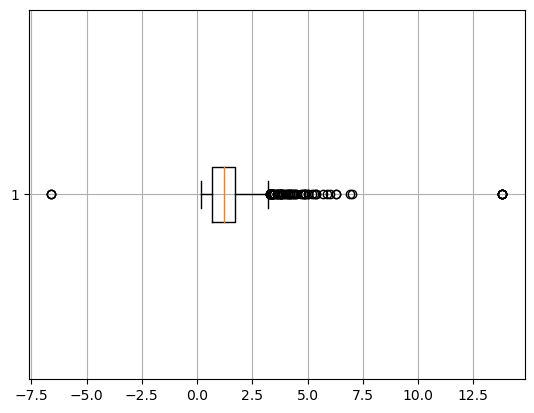

In [134]:
plt.grid()
plt.boxplot(data['MSTV'],vert=False)

In [135]:
q1,q3=np.percentile(data["MSTV"],[25,75])
q3-q1


1.0

C:\Users\amrit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


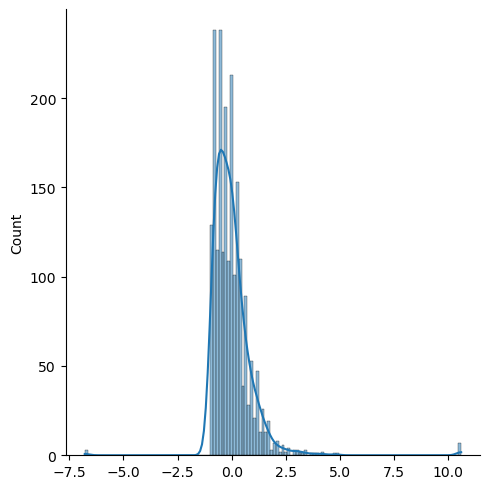

In [136]:
mstv=[]
for values in data['MSTV']:
    x=z_score(values,data["MSTV"].mean(),data["MSTV"].std())  # mean , sd
    mstv.append(x)
sns.displot(mstv,kde=True)


In [137]:
data["MSTV"].kurtosis(),data["MSTV"].skew()

(44.0067756856499, 4.141708828606578)

### ALTV

<Axes: >

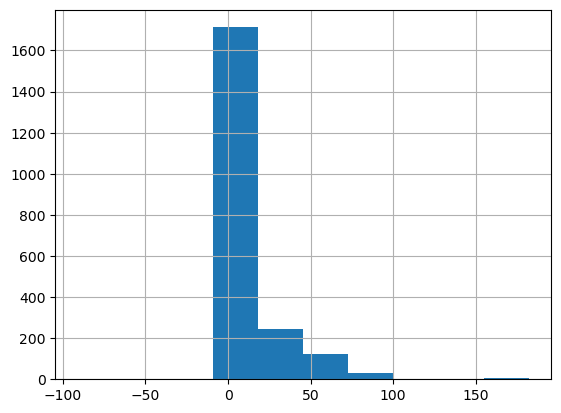

In [138]:
data['ALTV'].hist()

In [139]:
data['ALTV'].mean(),data['ALTV'].median(),data['ALTV'].std()

(10.295649531655464, 0.0, 21.21267581654737)

{'whiskers': [<matplotlib.lines.Line2D at 0x2482af7d850>,
 'caps': [<matplotlib.lines.Line2D at 0x2482af7ea50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2482af7cf90>],
 'medians': [<matplotlib.lines.Line2D at 0x2482af7f850>],
 'fliers': [<matplotlib.lines.Line2D at 0x2482af57190>],
 'means': []}

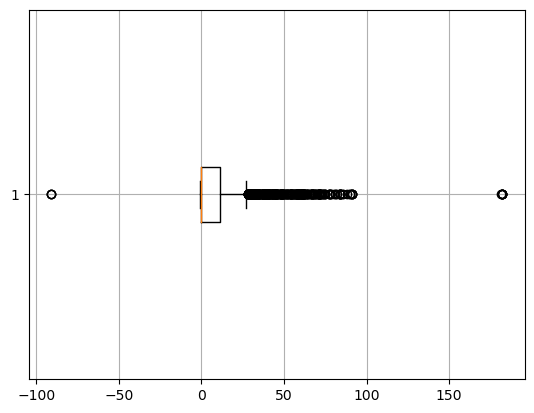

In [140]:
plt.grid()
plt.boxplot(data['ALTV'],vert=False)

In [141]:
q1,q3=np.percentile(data["ALTV"],[25,75])
q3-q1


11.0

C:\Users\amrit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


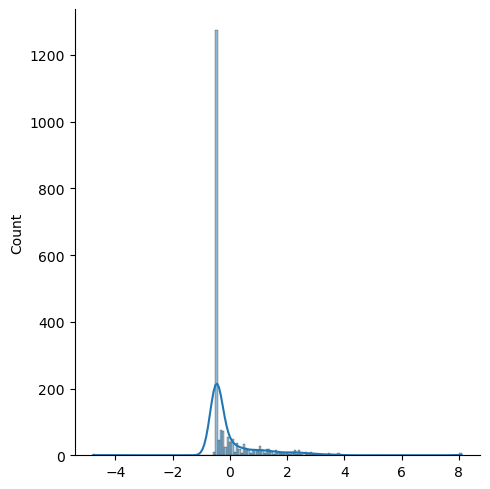

In [142]:
altv=[]
for values in data['ALTV']:
    x=z_score(values,data["ALTV"].mean(),data["ALTV"].std())  # mean , sd
    altv.append(x)
sns.displot(altv,kde=True)


In [143]:
data["ALTV"].kurtosis(),data["ALTV"].skew()


(15.897009267384622, 2.9795256817516247)

### MLTV

<Axes: >

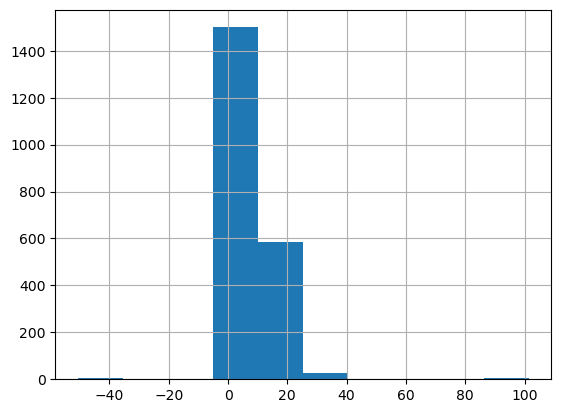

In [144]:
data['MLTV'].hist()


In [145]:
data['MLTV'].mean(),data['MLTV'].median(),data['MLTV'].std()

(8.271839940662925, 7.4, 7.73691042452668)

{'whiskers': [<matplotlib.lines.Line2D at 0x2482b13c190>,
 'caps': [<matplotlib.lines.Line2D at 0x2482b13d350>,
 'boxes': [<matplotlib.lines.Line2D at 0x2482b133890>],
 'medians': [<matplotlib.lines.Line2D at 0x2482b13e290>],
 'fliers': [<matplotlib.lines.Line2D at 0x2482b13ea90>],
 'means': []}

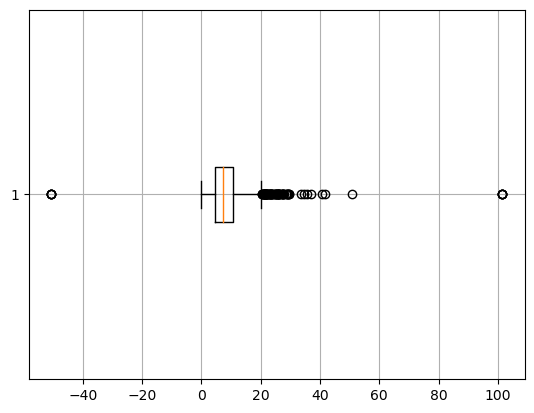

In [146]:
plt.grid()
plt.boxplot(data['MLTV'],vert=False)


In [147]:
q1,q3=np.percentile(data["MLTV"],[25,75])
q3-q1


6.200000000000001

C:\Users\amrit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


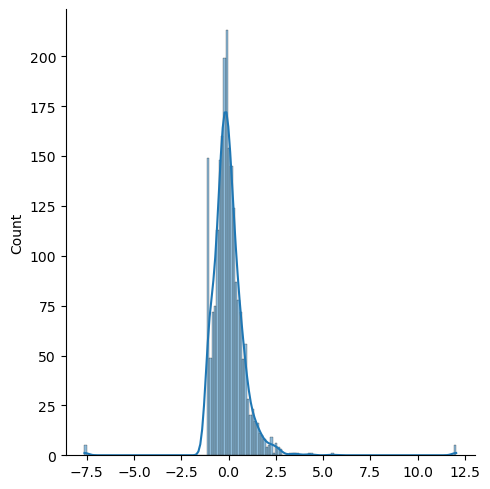

In [148]:
mltv=[]
for values in data['MLTV']:
    x=z_score(values,data["MLTV"].mean(),data["MLTV"].std())  # mean , sd
    mltv.append(x)
sns.displot(mltv,kde=True)


In [149]:
data["MLTV"].kurtosis(),data["MLTV"].skew()

(56.516731724599445, 3.563586653603781)

### Width

<Axes: >

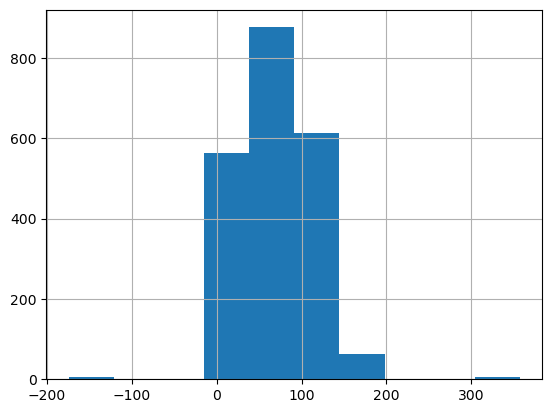

In [150]:
data['Width'].hist()

In [151]:
data['Width'].mean(),data['Width'].median(),data['Width'].std()

(70.43164273546243, 67.48646809530248, 42.727919128083464)

{'whiskers': [<matplotlib.lines.Line2D at 0x2482b6bca50>,
 'caps': [<matplotlib.lines.Line2D at 0x2482b6bddd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2482b6bc250>],
 'medians': [<matplotlib.lines.Line2D at 0x2482b6bed90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2482b6bd390>],
 'means': []}

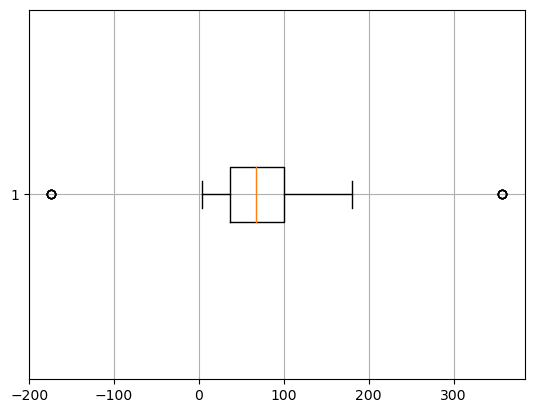

In [152]:
plt.grid()
plt.boxplot(data['Width'],vert=False)


In [153]:
q1,q3=np.percentile(data["Width"],[25,75])
q3-q1


63.0

C:\Users\amrit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


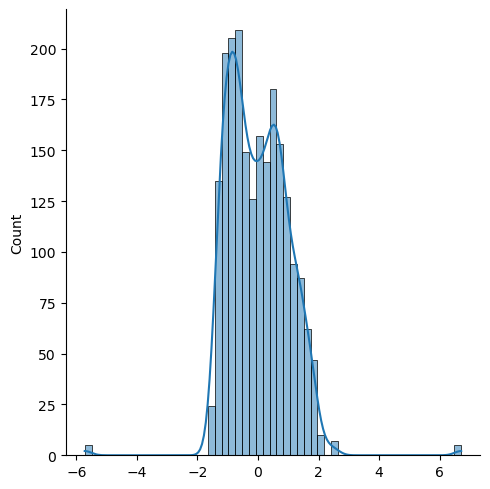

In [154]:
width=[]
for values in data['Width']:
    x=z_score(values,data["Width"].mean(),data["Width"].std())  # mean , sd
    width.append(x)
sns.displot(width,kde=True)


In [155]:
data["Width"].kurtosis(),data["Width"].skew()

(5.728518729914992, 0.49815595644749827)

### Tendency

<Axes: >

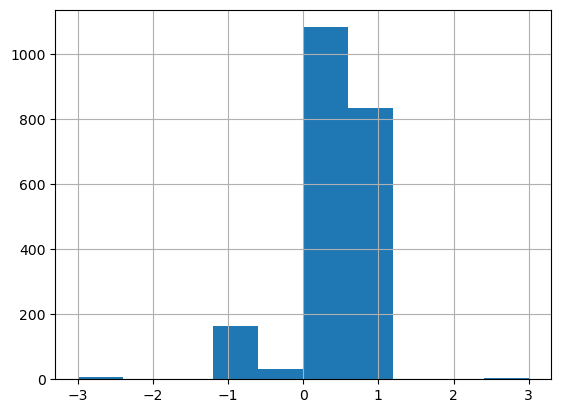

In [156]:
data['Tendency'].hist()


In [157]:
data['Tendency'].mean(),data['Tendency'].median(),data['Tendency'].std()


(0.3135413395230087, 0.0, 0.6434165794369975)

{'whiskers': [<matplotlib.lines.Line2D at 0x2482c89ae50>,
 'caps': [<matplotlib.lines.Line2D at 0x2482c8a8790>,
 'boxes': [<matplotlib.lines.Line2D at 0x2482c89a310>],
 'medians': [<matplotlib.lines.Line2D at 0x2482c8a9cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2482c8aa750>],
 'means': []}

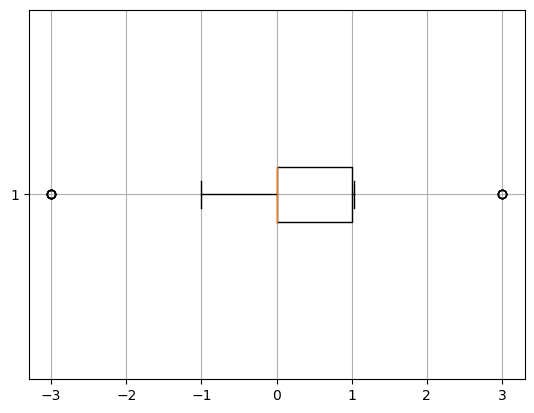

In [158]:
plt.grid()
plt.boxplot(data['Tendency'],vert=False)

In [159]:
q1,q3=np.percentile(data["Tendency"],[25,75])
q3-q1


1.0

In [162]:
q1

0.0

In [164]:
q3

1.0

{'bodies': [<matplotlib.collections.PolyCollection at 0x2483d6ce1d0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2483a6fb4d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2483d684650>,
 'cbars': <matplotlib.collections.LineCollection at 0x2483d6f3c90>,
 'cmedians': <matplotlib.collections.LineCollection at 0x2483d6fe2d0>}

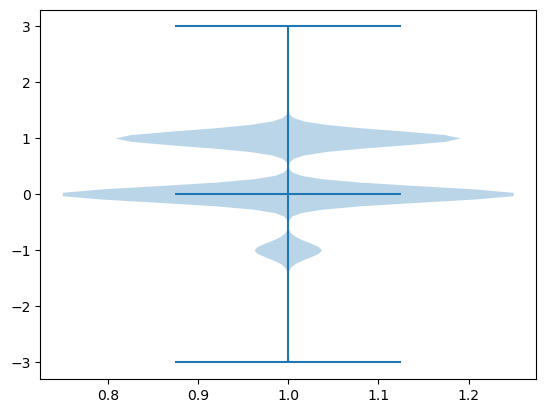

In [179]:
plt.figure()
plt.violinplot(data["Tendency"], showmedians=True)


C:\Users\amrit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


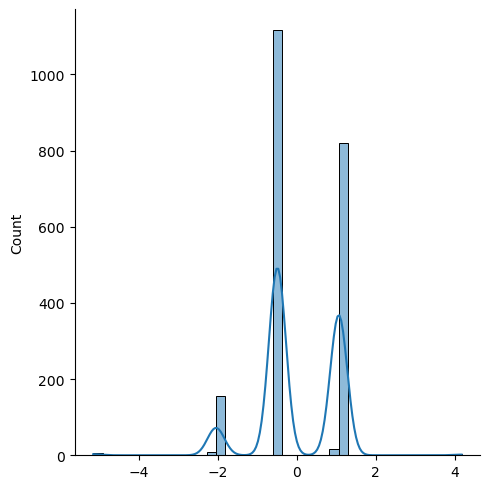

In [160]:
tendency=[]
for values in data['Tendency']:
    x=z_score(values,data["Tendency"].mean(),data["Tendency"].std())  # mean , sd
    tendency.append(x)
sns.displot(tendency,kde=True)

In [161]:
data["Tendency"].kurtosis(),data["Tendency"].skew()

(1.4386065657872158, -0.485275019371189)

### NSP

<Axes: >

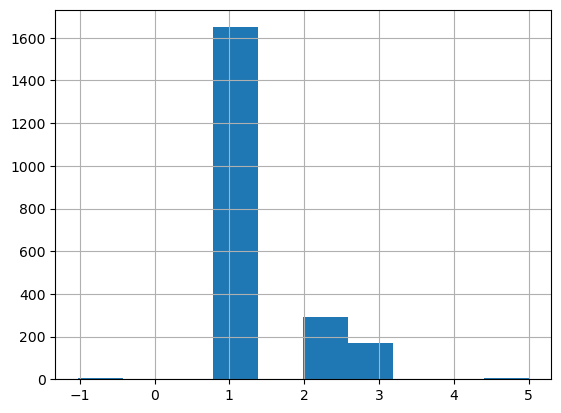

In [166]:
data['NSP'].hist()


In [167]:
data['NSP'].mean(),data['NSP'].median(),data['NSP'].std()


(1.3017832408703274, 1.0, 0.6423686637168451)

{'whiskers': [<matplotlib.lines.Line2D at 0x2482ca65e50>,
 'caps': [<matplotlib.lines.Line2D at 0x2482ca67150>,
 'boxes': [<matplotlib.lines.Line2D at 0x2482ca65750>],
 'medians': [<matplotlib.lines.Line2D at 0x2482ca74110>],
 'fliers': [<matplotlib.lines.Line2D at 0x2482ca67f90>],
 'means': []}

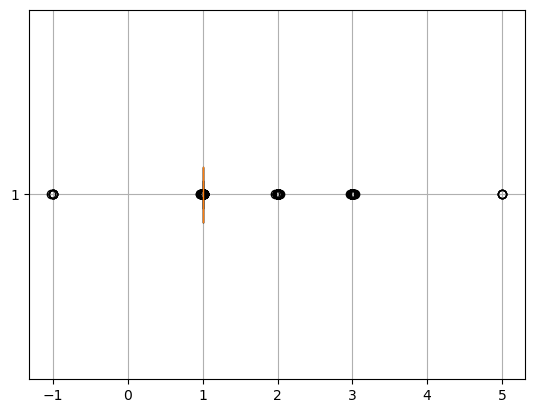

In [168]:
plt.grid()
plt.boxplot(data['NSP'],vert=False)


{'bodies': [<matplotlib.collections.PolyCollection at 0x2483a65d350>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2483d684610>,
 'cmins': <matplotlib.collections.LineCollection at 0x2483d4cdad0>,
 'cbars': <matplotlib.collections.LineCollection at 0x2483d65ed90>,
 'cmedians': <matplotlib.collections.LineCollection at 0x2483d686050>}

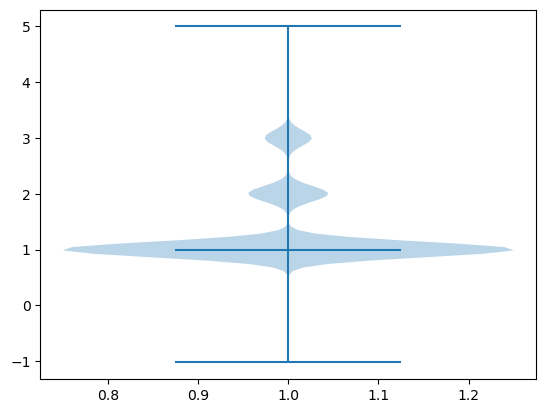

In [178]:
plt.figure()
plt.violinplot(data["NSP"], showmedians=True)


In [169]:
q1,q3=np.percentile(data["NSP"],[25,75])
q3-q1

0.0

C:\Users\amrit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


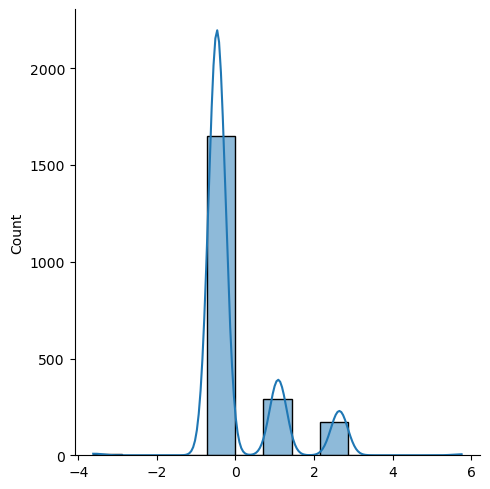

In [170]:
nsp=[]
for values in data['NSP']:
    x=z_score(values,data["NSP"].mean(),data["NSP"].std())  # mean , sd
    nsp.append(x)
sns.displot(nsp,kde=True)

In [ ]:
data["NSP"].kurtosis(),data["NSP"].skew()

## Pair Plot

C:\Users\amrit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


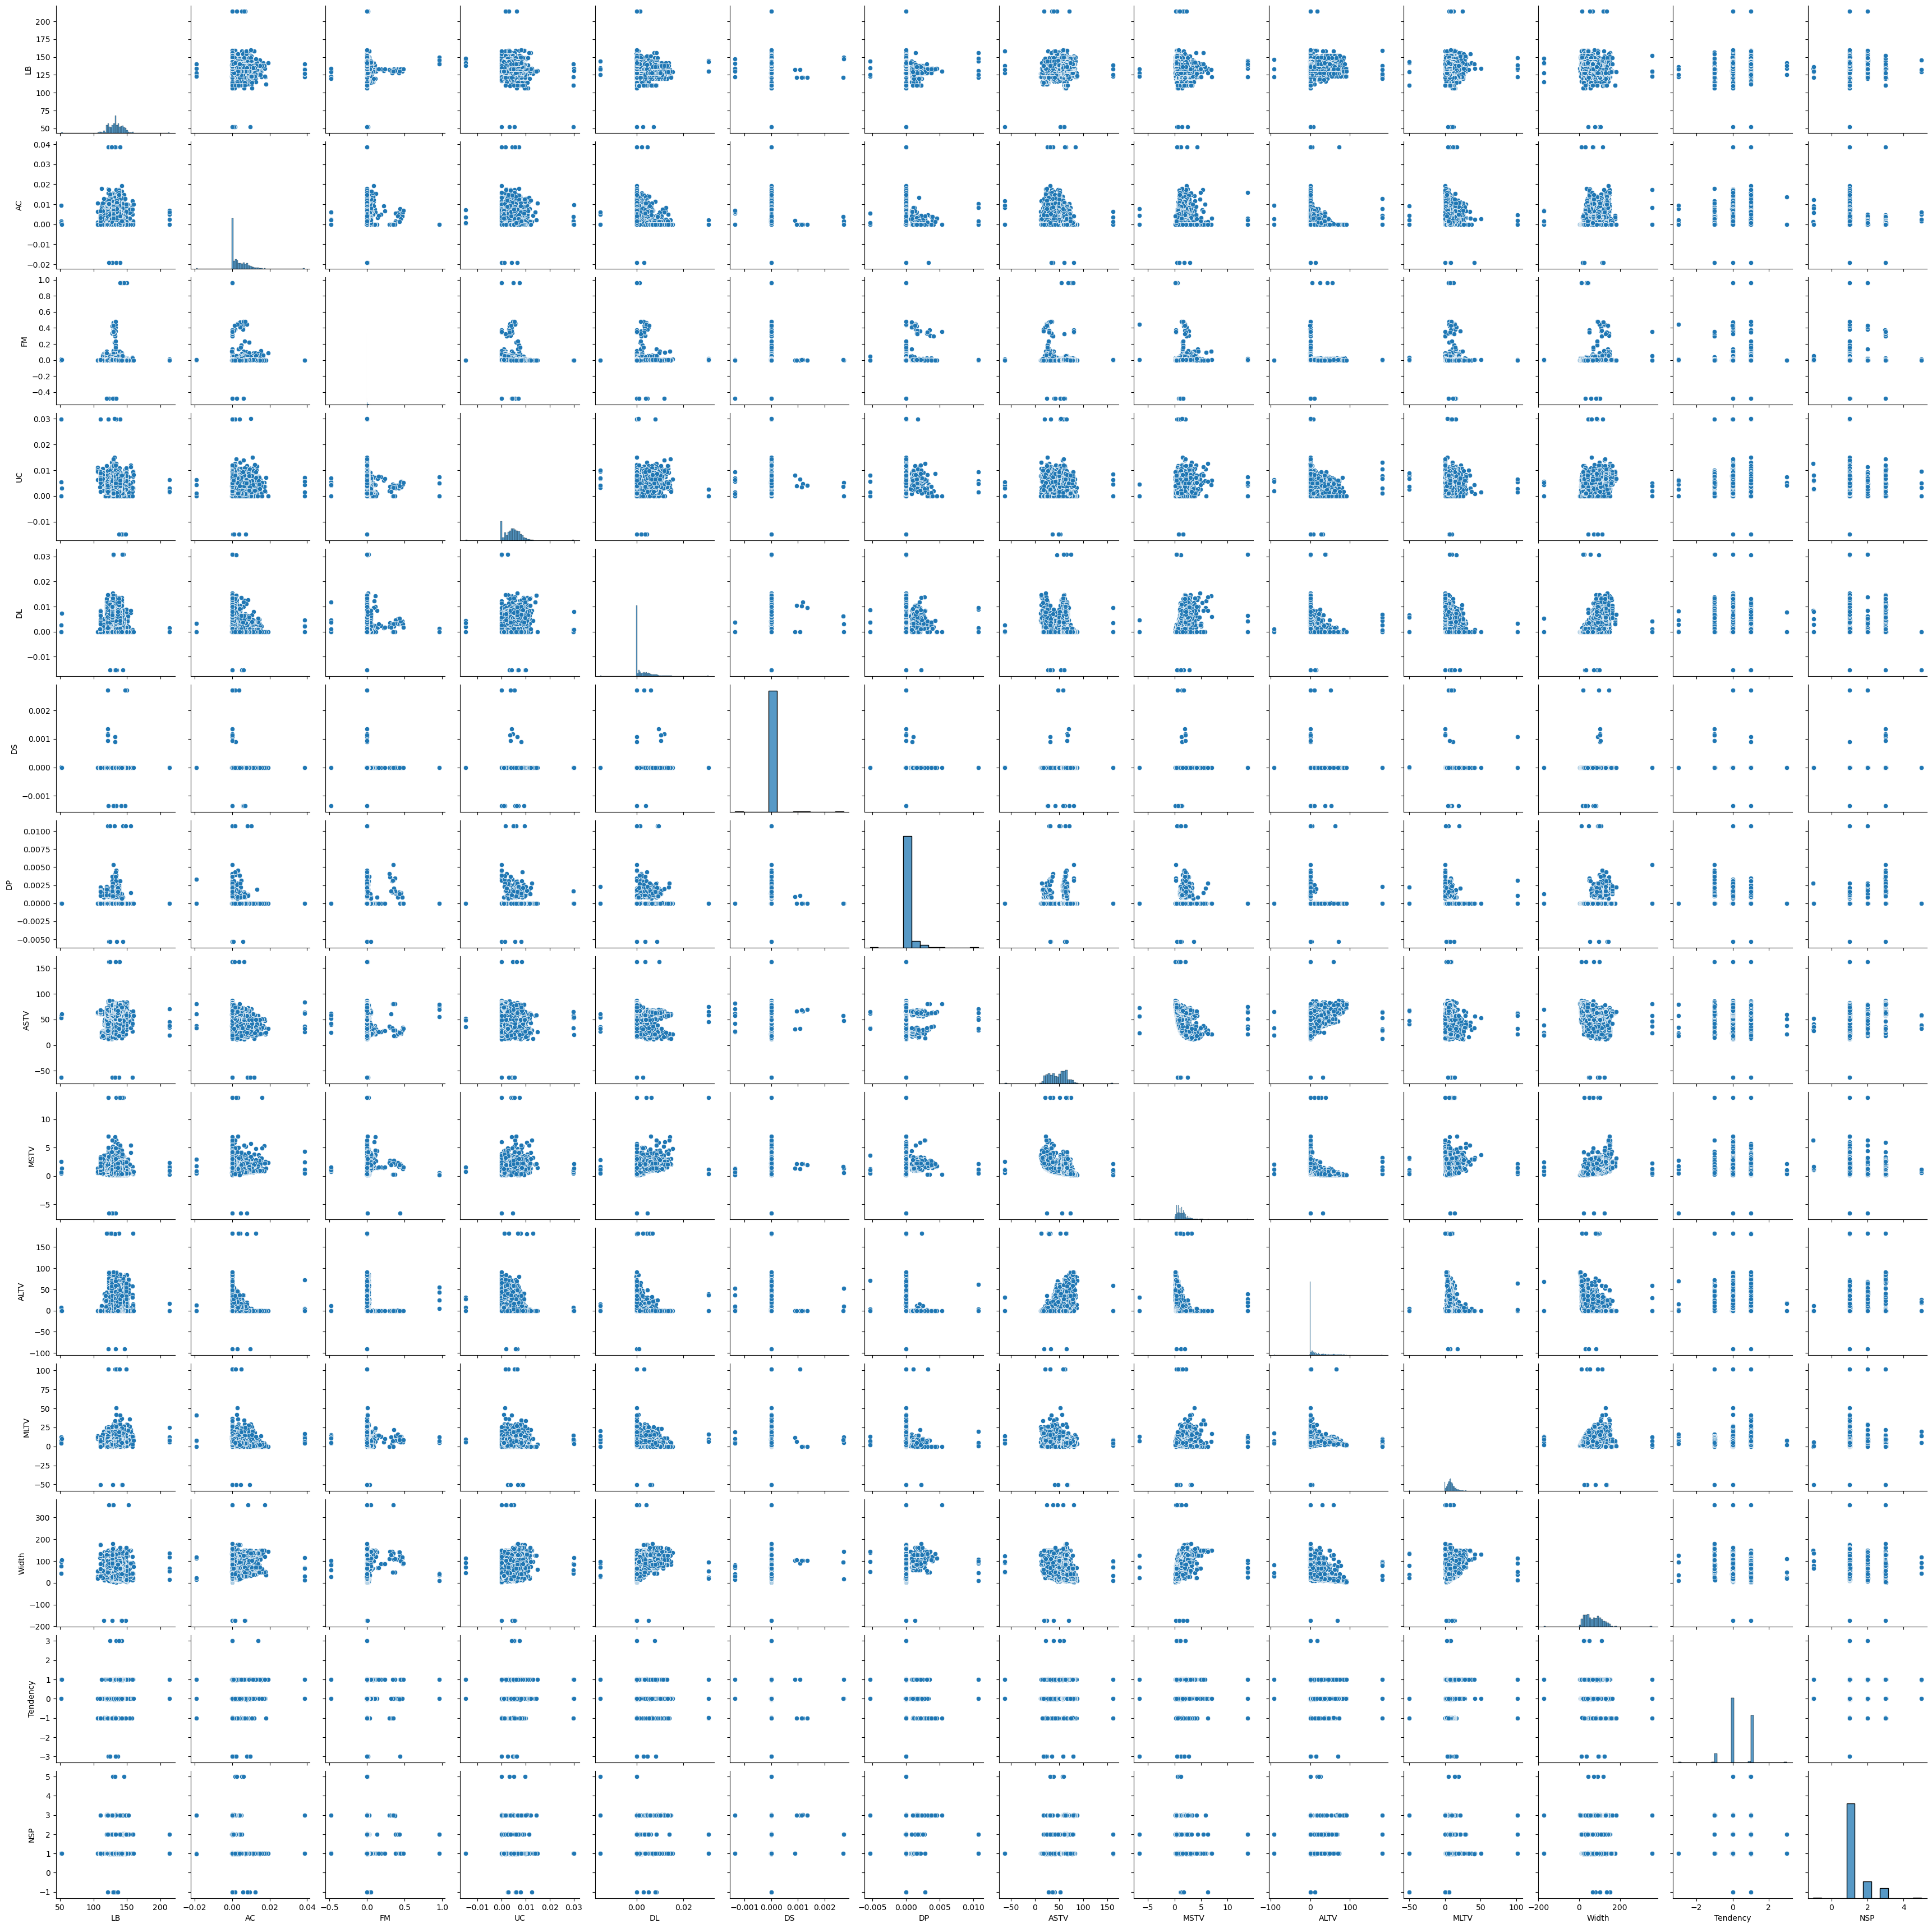

In [171]:
sns.pairplot(data)

In [172]:
data.corr(numeric_only=True)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.063425,0.018839,-0.166669,-0.126585,-0.005433,-0.047653,0.241667,-0.169310,0.210769,-0.003190,-0.118351,0.236976,0.132003
AC,-0.063425,1.000000,0.009743,0.071313,-0.093581,-0.033097,-0.083350,-0.231086,0.133215,-0.269967,-0.104635,0.234541,0.031630,-0.311855
FM,0.018839,0.009743,1.000000,-0.053386,0.009641,0.029914,0.121434,-0.032838,0.017061,-0.012005,-0.006041,0.097193,-0.017888,0.074389
UC,-0.166669,0.071313,-0.053386,1.000000,0.189737,-0.006958,0.070144,-0.182379,0.189685,-0.227881,-0.048854,0.106485,-0.067314,-0.185766
DL,-0.126585,-0.093581,0.009641,0.189737,1.000000,0.058413,0.144631,-0.069907,0.410216,-0.187275,-0.165035,0.408354,-0.024180,0.024634
DS,-0.005433,-0.033097,0.029914,-0.006958,0.058413,1.000000,0.004317,0.008415,0.016028,-0.004344,0.034384,0.040842,-0.015304,0.065410
DP,-0.047653,-0.083350,0.121434,0.070144,0.144631,0.004317,1.000000,0.037959,0.118647,-0.077079,-0.113728,0.175341,-0.129316,0.295002
ASTV,0.241667,-0.231086,-0.032838,-0.182379,-0.069907,0.008415,0.037959,1.000000,-0.293820,0.357310,-0.219204,-0.207769,-0.011289,0.420738
MSTV,-0.169310,0.133215,0.017061,0.189685,0.410216,0.016028,0.118647,-0.293820,1.000000,-0.291979,0.028326,0.433024,-0.038010,-0.095881
ALTV,0.210769,-0.269967,-0.012005,-0.227881,-0.187275,-0.004344,-0.077079,0.357310,-0.291979,1.000000,-0.106963,-0.346267,0.038019,0.366318


From the correlation table we can see there no two features which have moderate or strong Correlation

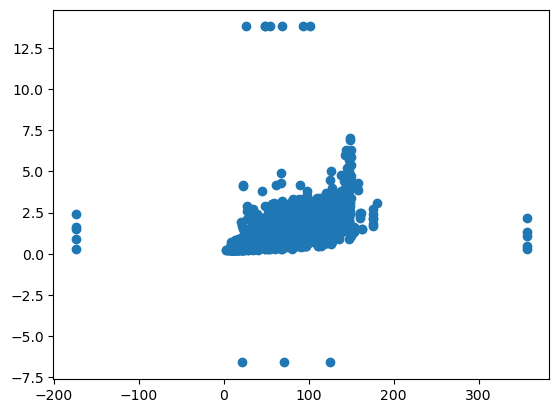

In [188]:
plt.scatter(data["Width"], data["MSTV"])

r < 0.25	No relationship
0.25 < r < 0.5	Weak relationship
0.5 < r < 0.75	Moderate relationship
r > 0.75	Strong relationship

<Axes: >

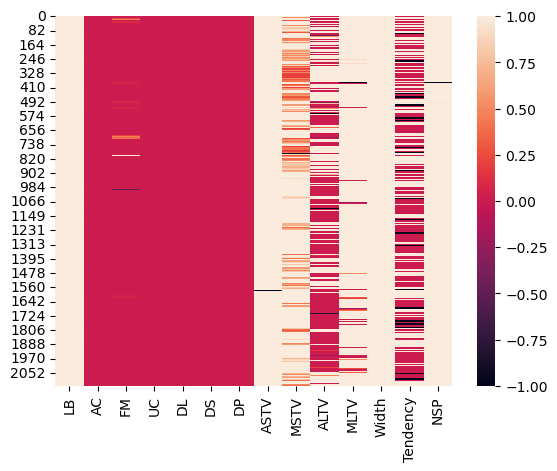

In [62]:
sns.heatmap(data,vmin=-1, vmax=1,)